In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATADIR = Path("../input/rsna-str-pulmonary-embolism-detection/")

train = pd.read_csv(DATADIR / "train.csv")
pre = pd.read_csv(DATADIR / "sop_to_prefix.csv")
train = train.merge(pre, on="SOPInstanceUID")

In [37]:
g = train.groupby("SOPInstanceUID").count().reset_index()
sns.countplot(data=g, x="SOPInstanceUID")

In [ ]:
g = train.groupby("img_prefix").count()

#### PE_PRESENT_PON_IMAGE は位置依存がかなりある（当然）

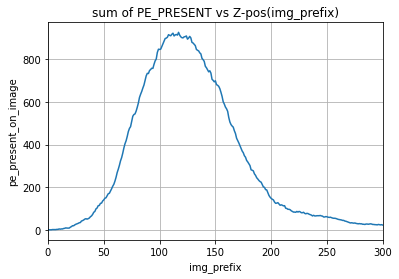

In [32]:
g = train.groupby("img_prefix")["pe_present_on_image"].sum()
g = g.reset_index()
plt.title("sum of PE_PRESENT vs Z-pos(img_prefix)")
plt.grid()
plt.xlim(0, 300)
sns.lineplot(data=g, x="img_prefix", y="pe_present_on_image")

In [4]:
train_pos = train.query("negative_exam_for_pe==0 and indeterminate==0")

In [11]:
pe_img_count = train_pos.groupby("StudyInstanceUID")["pe_present_on_image"].sum()

In [15]:
pe_img_count.describe()

count    2211.000000
mean       43.663501
std        35.768573
min         1.000000
25%        14.000000
50%        34.000000
75%        67.000000
max       242.000000
Name: pe_present_on_image, dtype: float64